In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

# Analytics/Metrics
from sklearn.feature_extraction.text import CountVectorizer

# Data Cleaning
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer

## Variables

In [2]:
# Variables

#=========================#
# data
#=========================#

# Input data filepath
RAW_DIRNAME = "C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\macop_training\\"
# Input data
filename = "uci-news-aggregator.csv"

# Output
OUTPUT_DIRNAME = ""
MODIFIER = "A"

In [3]:
# Read in data
df = pd.read_csv(str(RAW_DIRNAME)+str(filename))

## String Cleaning

In [20]:
# List of stopwords.  Add any words you would like to clean from your dataset.
newStopWords = ['ourselves', 'here', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 
                'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 
                'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 
                'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 
                'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 
                'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 
                'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 
                'myself', 'which', 'those', 'i', 'I','after', 'few', 'whom', 'being', 'if', 'theirs', 'my', 'against','a', 'by', 'doing', 
                'it', 'how', 'further', 'was', 'here','than','can', 'let', 'll', 'that',
                # Chevron specific items added below:
                "chevron", "technology", "technologies", "team", "project", "technology", "’", ".", "use", ",", "identify", "case", "study"
                
               ]

In [21]:
ps=PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Lowercase words
df['clean_abstract'] = df['Abstract Text (limit to 250 words)'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# Remove stopwords
df['clean_abstract'] = df['clean_abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newStopWords)]))
# Tokenize
df['clean_abstract'] = df['clean_abstract'].apply(nltk.word_tokenize)
# Lemmatize
df['clean_abstract'] = df['clean_abstract'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x]))
# Remove stopwords
df['clean_abstract'] = df['clean_abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newStopWords)]))

In [1]:
# Quick checks
# df.head()
# df['clean_abstract'][0]

## Check Word Counts

YEAR TO SLICE ON:.. 2023, Observations: 110


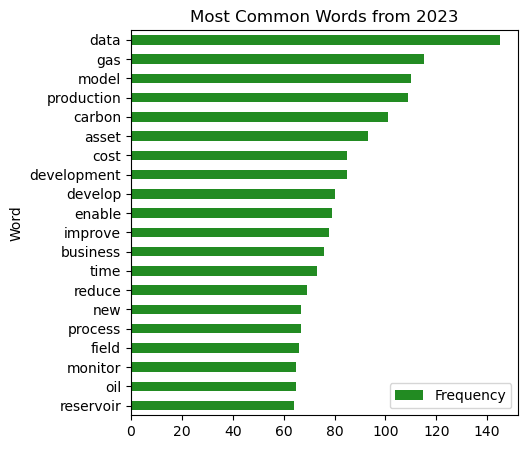

In [25]:
# Count total len of df

list_of_years = df['year'].unique()

for i in list_of_years:
    sliced_df = df[df["year"]==i]
    print(f"YEAR TO SLICE ON:.. {i}, Observations: {len(sliced_df)}")

    # CountWordFrequency

    #Create DTM
    cv = CountVectorizer(ngram_range = (1,3), stop_words='english')
    dtm = cv.fit_transform(sliced_df['clean_abstract'])
    words = np.array(cv.get_feature_names_out())

    #Look at top 10 most frequent words
    freqs=dtm.sum(axis=0).A.flatten()
    index=np.argsort(freqs)[-20:]

    # Construct dataframe
    WordFreq = pd.DataFrame.from_records(list(zip(words[index], freqs[index])))
    WordFreq.columns = ['Word', 'Frequency']

    # Plot horizontal bar graph
    fig, ax = plt.subplots(figsize=(5, 5))
    WordFreq.sort_values(by='Frequency').plot.barh(
                      x='Word',
                      y='Frequency',
                      ax=ax,
                      color="forestgreen")

    # COLORS: darkred, goldenrod, forestgreen, deepskyblue, rebeccapurple

    plt.title(f"Most Common Words from {i}")

## Write out files

In [ ]:
OUT_FILE = os.path.join(OUTPUT_DIRNAME, f"{timestamp}_{modifier}.csv".format(timestamp=date.today(), modifier=MODIFIER))